In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# Sample data
data = {
    'CustomerID': [1, 2, 3, 4, 5, 6],
    'Age': [19, 21, 20, 23, 31, 22],
    'AnnualIncome': [15, 16, 17, 18, 19, 21],
    'SpendingScore': [39, 81, 6, 77, 40, 71]
}

# Convert to DataFrame
df = pd.DataFrame(data)

In [3]:
# Select features for clustering
X = df[['Age', 'AnnualIncome', 'SpendingScore']]

In [4]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Find the optimal number of clusters using the Elbow Method
wcss = []
max_clusters = len(X_scaled)  # Ensure max clusters do not exceed the number of samples
for i in range(1, max_clusters + 1):  # Loop through 1 to the total number of samples
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

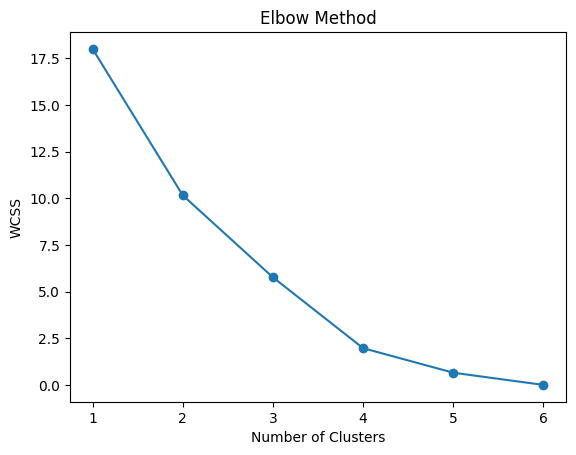

In [10]:
# Plot the Elbow graph
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
# Apply K-Means clustering with the optimal number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [12]:
# Add the cluster labels to the DataFrame
df['Cluster'] = y_kmeans
print("Customer Data with Cluster Labels:")
print(df)

Customer Data with Cluster Labels:
   CustomerID  Age  AnnualIncome  SpendingScore  Cluster
0           1   19            15             39        0
1           2   21            16             81        2
2           3   20            17              6        0
3           4   23            18             77        2
4           5   31            19             40        1
5           6   22            21             71        1


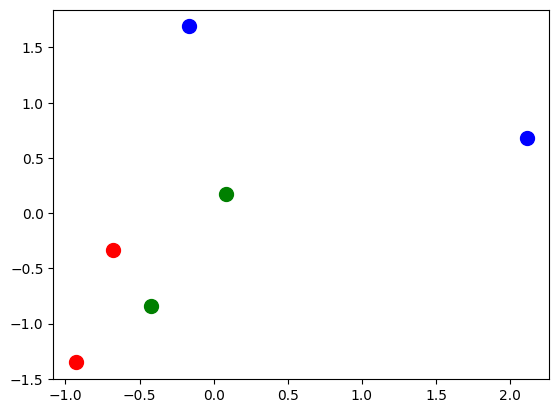

In [13]:
# Visualize the clusters
# Plotting (first two features for visualization purposes)
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')

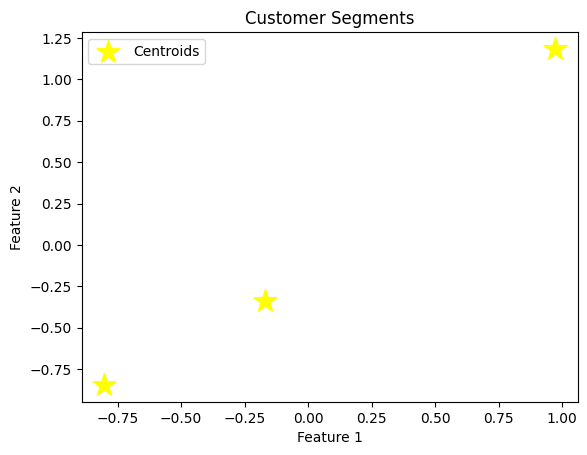

In [14]:
# Mark centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', marker='*', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()